In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
bc = pd.read_csv('BTC_USD.csv')

In [3]:
bc.head(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566
5,BTC,2013-10-06,120.65533,121.33866,121.85216,120.55450
6,BTC,2013-10-07,121.79500,120.65533,121.99166,120.43199
7,BTC,2013-10-08,123.03300,121.79500,123.64016,121.35066
8,BTC,2013-10-09,124.04900,123.03300,124.78350,122.59266
9,BTC,2013-10-10,125.96116,124.04900,128.01683,123.81966


In [4]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Date                 2787 non-null   object 
 2   Closing Price (USD)  2787 non-null   float64
 3   24h Open (USD)       2787 non-null   float64
 4   24h High (USD)       2787 non-null   float64
 5   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(2)
memory usage: 130.8+ KB


In [5]:
bc['Date'] = pd.to_datetime(bc['Date'])

In [26]:
train_dates = bc['Date']

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Currency             2787 non-null   object        
 1   Date                 2787 non-null   datetime64[ns]
 2   Closing Price (USD)  2787 non-null   float64       
 3   24h Open (USD)       2787 non-null   float64       
 4   24h High (USD)       2787 non-null   float64       
 5   24h Low (USD)        2787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 130.8+ KB


In [7]:
bc.tail(10)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
2777,BTC,2021-05-09,58788.209679,57419.147888,59575.463115,57028.498049
2778,BTC,2021-05-10,58102.191426,58966.915010,59249.141676,56494.915334
2779,BTC,2021-05-11,55715.546651,58308.318048,59560.025459,53774.628243
2780,BTC,2021-05-12,56573.555472,55899.752971,56956.075029,54571.693210
2781,BTC,2021-05-13,52147.821187,56767.711063,58036.509777,51625.547849
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969
2786,BTC,2021-05-18,43144.471291,46439.336570,46622.853437,42102.346430


In [8]:
column = list(bc)[2:3]

In [9]:
column

['Closing Price (USD)']

In [10]:
train_bc = bc[column].astype(float)

In [11]:
train_bc

,Closing Price (USD)
0,123.654990
1,125.455000
2,108.584830
3,118.674660
4,121.338660
...,...
2782,49764.132082
2783,50032.693137
2784,47885.625255
2785,45604.615754


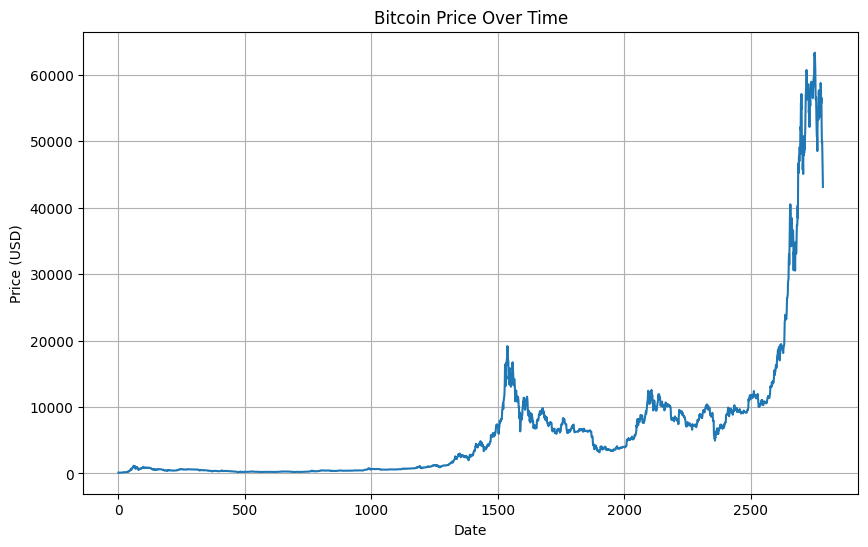

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(bc.index, bc['Closing Price (USD)'], linestyle='-')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [13]:
scaler = StandardScaler()
scaler = scaler.fit(train_bc)
train_bc_scaled = scaler.transform(train_bc)

In [14]:
trainX = []
trainY = []

In [15]:
n_future = 1
n_past = 14

In [16]:
for i in range(n_past, len(train_bc_scaled) - n_future + 1):
    trainX.append(train_bc_scaled[i - n_past:i, 0:train_bc.shape[1]])
    trainY.append(train_bc_scaled[i + n_future - 1: i + n_future, 0])

In [17]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [18]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (2773, 14, 1).
trainY shape == (2773, 1).


In [19]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

In [20]:
model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 29345 (114.63 KB)
Trainable params: 29345 (114.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(trainX, trainY, epochs=25, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/25
156/156 [==============================] - 48s 300ms/step - loss: 0.0307 - val_loss: 211.2478
Epoch 2/25
156/156 [==============================] - 46s 294ms/step - loss: 0.0039 - val_loss: 0.4910
Epoch 3/25
156/156 [==============================] - 45s 285ms/step - loss: 0.0031 - val_loss: 4.1302
Epoch 4/25
156/156 [==============================] - 44s 285ms/step - loss: 0.0025 - val_loss: 6.3903
Epoch 5/25
156/156 [==============================] - 44s 281ms/step - loss: 0.0026 - val_loss: 1.7952
Epoch 6/25
156/156 [==============================] - 46s 296ms/step - loss: 0.0023 - val_loss: 2.9556
Epoch 7/25
156/156 [==============================] - 44s 282ms/step - loss: 0.0020 - val_loss: 0.2560
Epoch 8/25
156/156 [==============================] - 44s 282ms/step - loss: 0.0019 - val_loss: 1.7099
Epoch 9/25
156/156 [==============================] - 45s 289ms/step - loss: 0.0018 - val_loss: 2.3381
Epoch 10/25
156/156 [==============================] - 44s 283ms/step -

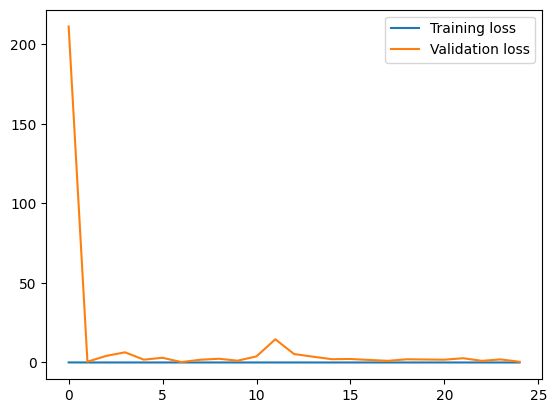

In [23]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [24]:
n_past = 16
n_days_for_prediction=15 

In [27]:
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='D').tolist()
print(predict_period_dates)

[Timestamp('2021-05-03 00:00:00'), Timestamp('2021-05-04 00:00:00'), Timestamp('2021-05-05 00:00:00'), Timestamp('2021-05-06 00:00:00'), Timestamp('2021-05-07 00:00:00'), Timestamp('2021-05-08 00:00:00'), Timestamp('2021-05-09 00:00:00'), Timestamp('2021-05-10 00:00:00'), Timestamp('2021-05-11 00:00:00'), Timestamp('2021-05-12 00:00:00'), Timestamp('2021-05-13 00:00:00'), Timestamp('2021-05-14 00:00:00'), Timestamp('2021-05-15 00:00:00'), Timestamp('2021-05-16 00:00:00'), Timestamp('2021-05-17 00:00:00')]


In [28]:
prediction = model.predict(trainX[-n_days_for_prediction:])

1/1 [==============================] - 0s 451ms/step


In [31]:
prediction_copies = np.repeat(prediction, train_bc.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [32]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [42]:
bc_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Closing Price (USD)':y_pred_future})
bc_forecast['Date']=pd.to_datetime(bc_forecast['Date'])

<Axes: xlabel='Date', ylabel='Closing Price (USD)'>

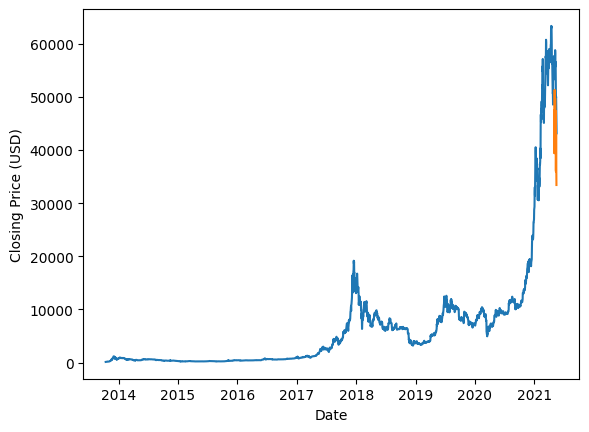

In [44]:
original = bc[['Date', 'Closing Price (USD)']]
original.loc[:, 'Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2013-10-13']

# sns.lineplot(original['Date'], original['Closing Price (USD)'])
# sns.lineplot(bc_forecast['Date'], bc_forecast['Closing Price (USD)'])

sns.lineplot(data=original, x='Date', y='Closing Price (USD)')
sns.lineplot(data=bc_forecast, x='Date', y='Closing Price (USD)')